In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [ ]:
data = np.random.uniform(-5, 5, [2, 100])
#пример получения данных с помощью numpy
#не лучший пример для демонстрации kmeans

In [ ]:
def dist(a,b):
    sum=0
    for i in range (a.shape[0]):
        sum+=((a[i]-b[i])/2)**2
    #return (sum)**0.5    
    return (sum)

In [ ]:
class KMeans:
    
    def __init__(self, n_clusters):
        self.k=n_clusters
        
    def init_center(self, a):
        center =  np.random.randint(0, a.shape[1]-1, self.k)
        i=0
        self.dots=arr = np.empty((0,2), float)
        for x in center:
            self.dots = np.append(self.dots, [a.T[x]], axis=0)
        
    def distination(self, a):
        s=0
        d_m = np.array([])
        for x in a.T:
            for y in self.dots:
                d_m=np.append(d_m, dist(x,y))
        d_m = np.resize(d_m,(a.shape[1],self.k))
        self.dist=d_m
    
    def for_plot(self, a):
        clus2=np.array([0]*a.shape[1])
        q=0
        for x in a.T:
            pod_clus=np.empty(0)
            for y in kmeans.dots:
                pod_clus=np.append(pod_clus, dist(x, y))
            clus2[q]=np.argmin(pod_clus)
            q+=1
        self.clus=clus2

    def dot_weight(self, a):
        weight=np.empty((kmeans.k,1))
        for i in range (kmeans.k):
            weight[i]=0
            t=0
            for j in X.T:
                #print(j)
                if (j in np.array(kmeans.clusters[i])):
                    weight[i]+=kmeans.dist[t][i]
                t+=1
        self.weight=weight
    
    def clusterization(self, a):
        clus1 = [0]*self.k
        for k in range(self.k):
            clus1[k]=[]
        k=0
        for i in self.dist:
            clus1[np.argmin(i)].append(a.T[k])
            k+=1
        self.clusters=clus1
        
    def move(self,a):
        t=0
        for i in self.clusters:
            new_x=0
            new_y=0
            if (len(i)>a.shape[1]/self.k/2): 
                for j in i:
                    new_x+=j[0]
                    new_y+=j[1]
                self.dots[t][0]=new_x/len(i)
                self.dots[t][1]=new_y/len(i)
                t+=1
            else:
                #меняем центр, если мало точек поблизости
                k=randint(0, a.shape[1]-1)
                self.dots[t]=np.array(a.T[k])

    def fit(self, a):
        self.init_center(a)
        
        self.distination(a)
        self.clusterization(a)
        b=self.dist
        k1=20
        k2=k1+20
        while((2<k1) and (2<abs(k2-k1))):
        #while(2<k1):
            k2=k1
            pred=b
            self.move(a)  
            self.distination(a)
            self.clusterization(a)
            b=self.dist
            k1=(np.sum(abs(pred-b)))
        self.for_plot(a)
        


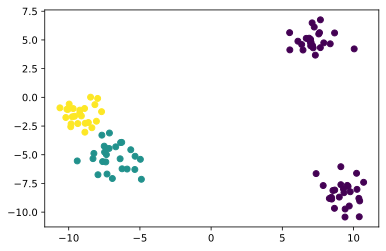

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=4)
X=X.T
kmeans = KMeans(3)
kmeans.fit(X)
plt.scatter(X[0],X[1], c=kmeans.clus)
plt.show()

In [ ]:
#оптимальное k для kmeans
#считаем массу кластера и умножаем на их количество
n=10
t=np.empty((n))
for i in range(n):
    kmeans = KMeans(i+1)
    kmeans.fit(X)
    kmeans.dot_weight(X)
    sum=0
    for j in range(kmeans.k):
        sum+=(kmeans.weight[j])*kmeans.k
    t[i]=sum
    print(sum, i+1)
print(np.argmin(t)+1)

[2335.19720293] 1
[1341.96076256] 2
[307.64502211] 3
[172.86249129] 4
[182.91702832] 5
[191.32882947] 6
[204.57019283] 7
[235.64565233] 8
[220.59013894] 9
[236.13811626] 10
4


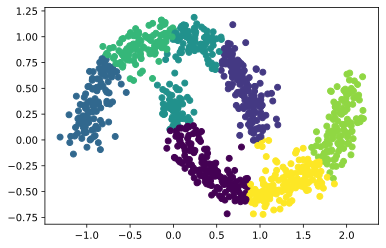

In [ ]:
#луны плохо поддаются кластеризации
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,random_state=2, noise=0.1)
X=X.T
kmeans = KMeans(7)
kmeans.fit(X)
plt.scatter(X[0],X[1], c=kmeans.clus)
plt.show()

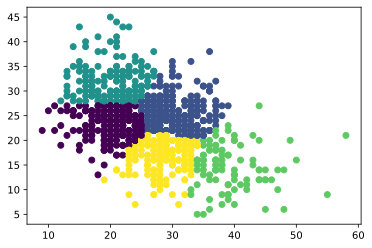

In [ ]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(n_samples=1000,n_features=2, n_classes=5)
X=X.T
kmeans = KMeans(5)
kmeans.fit(X)
plt.scatter(X[0],X[1], c=kmeans.clus)
plt.show()

Алгоритм kmeans хорошо разделяет скученные данные, но не подходит для разделения данных другого формата.